In [ ]:
# Basic Libraries
import numpy as np
import pandas as pd
import seaborn as sb
import glob as gb
import matplotlib.pyplot as plt # we only need pyplot
sb.set() # set the default Seaborn style for graphics

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, accuracy_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Importing and splitting data

In [ ]:
Updatereport = pd.read_csv('finalData.csv')
x = pd.DataFrame(Updatereport.drop(['Explained by: Freedom to make life choices','Explained by: Generosity','Explained by: Perceptions of corruption','Dystopia + residual','HDI Value','Country','Happiness score'], axis = 1))
y = pd.DataFrame(Updatereport['Happiness score'])
z = pd.DataFrame(Updatereport['HDI Value'])
# Split the Dataset into Train and Test
x_train, x_test, y_train, y_test, z_train, z_test = train_test_split(x, y, z, test_size = 0.3)

#### x consists of the predictor variables 'GDP per capita', 'Social support', 'Healthy Life Expectancy'
#### - We chose these variables as they have demonstrated strong correlations with 'Happiness Score' as compared to the other variables (excluding HDI Value)
#### y = 'Happiness Score' - Response and Predictor variable

#### z = 'HDI Value' - Additional response variable to test 'Happiness Score'

## Model 1: Random Forest

### Predicting 'Happiness Score'

/shared-libs/python3.11/py/lib/python3.11/site-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


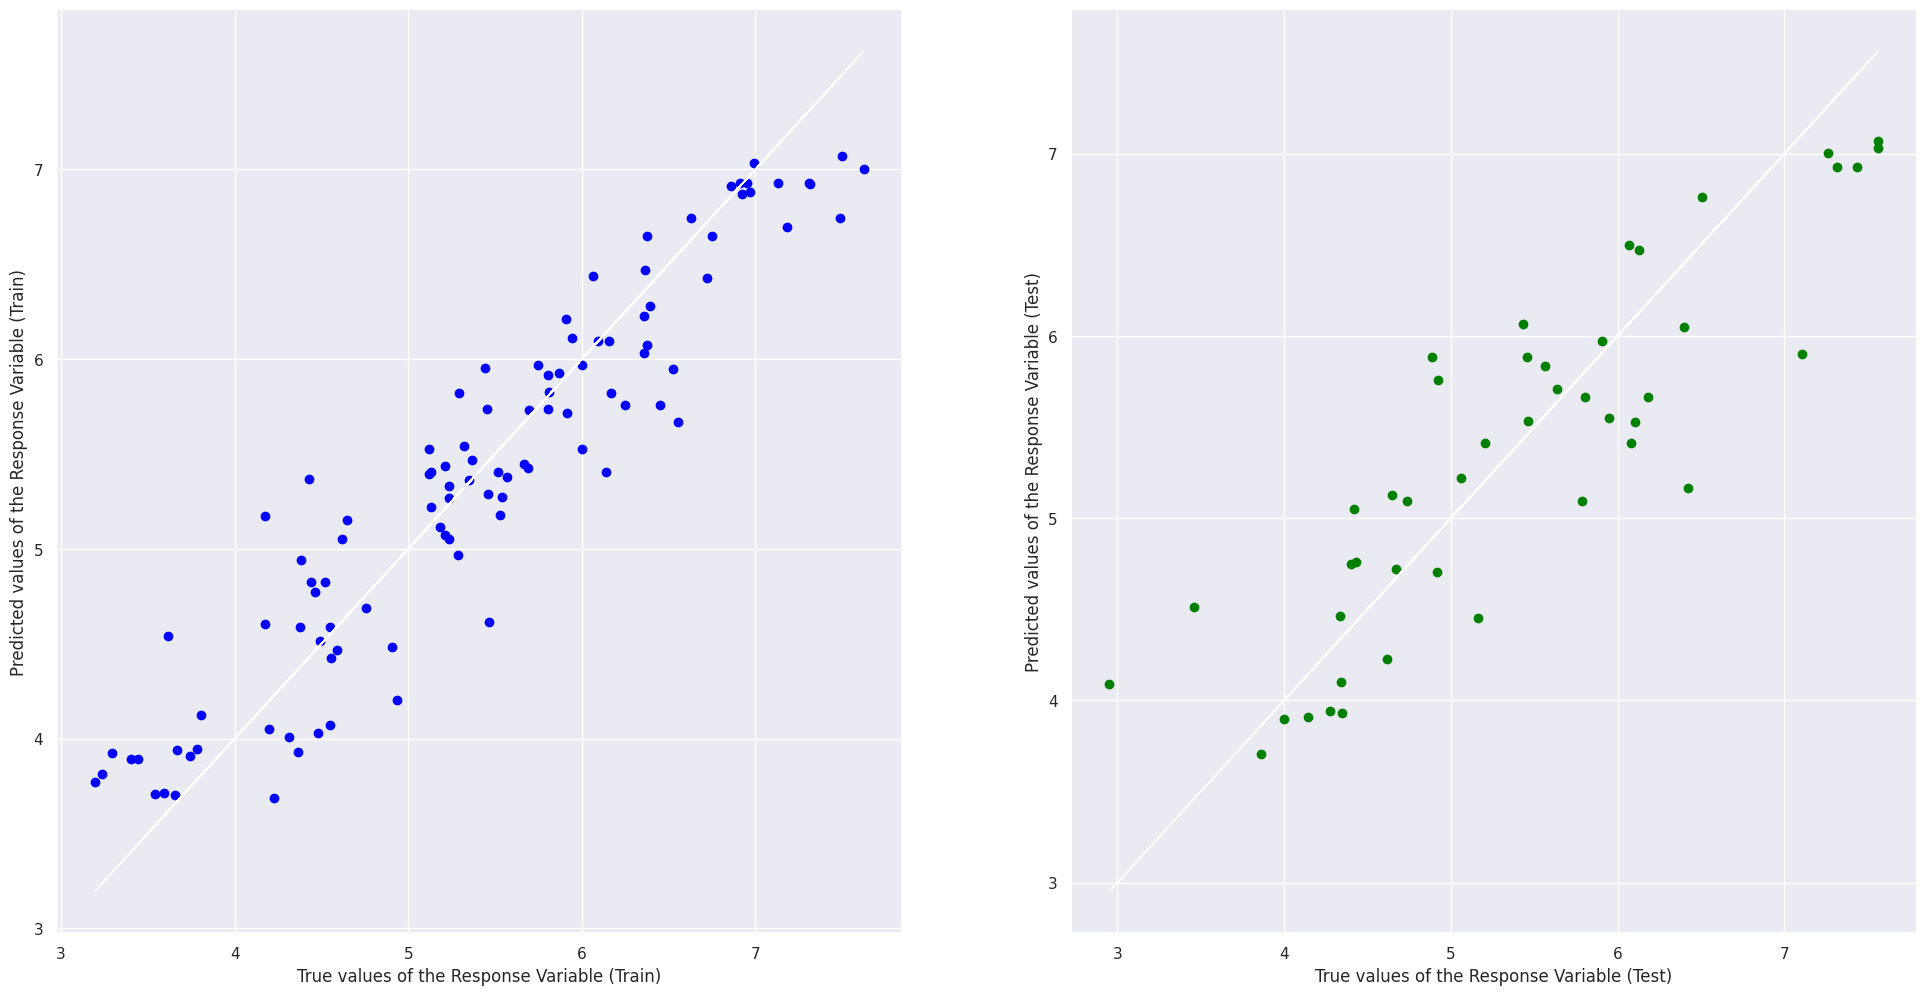

In [ ]:
# Create the Random Forest
regress = RandomForestRegressor(n_estimators=30,max_depth=3,random_state=42)  
regress.fit(x_train, y_train)
y_train_pred = regress.predict(x_train)
y_test_pred = regress.predict(x_test)

# Plot the Predictions vs the True values
f, axes = plt.subplots(1, 2, figsize=(24, 12))
axes[0].scatter(y_train, y_train_pred, color = "blue")
axes[0].plot(y_train, y_train, 'w-', linewidth = 1)
axes[0].set_xlabel("True values of the Response Variable (Train)")
axes[0].set_ylabel("Predicted values of the Response Variable (Train)")
axes[1].scatter(y_test, y_test_pred, color = "green")
axes[1].plot(y_test, y_test, 'w-', linewidth = 1)
axes[1].set_xlabel("True values of the Response Variable (Test)")
axes[1].set_ylabel("Predicted values of the Response Variable (Test)")
plt.show()

In [ ]:
print("Explained Variance (R^2) on Train Set \t:", regress.score(x_train, y_train))
print("Mean Squared Error (MSE) on Train Set \t:", mean_squared_error(y_train, y_train_pred))
print("Explained Variance (R^2) on Test Set \t:", regress.score(x_test, y_test))
print("Mean Squared Error (MSE) on Test Set \t:", mean_squared_error(y_test, y_test_pred))

Explained Variance (R^2) on Train Set 	: 0.8815003158927994
Mean Squared Error (MSE) on Train Set 	: 0.14747232872181512
Explained Variance (R^2) on Test Set 	: 0.7669433850545102
Mean Squared Error (MSE) on Test Set 	: 0.2929224575762702


In [ ]:
# Calculate feature importance
feature_importance = regress.feature_importances_

# Create a DataFrame to display feature importance scores
feature_importance_df = pd.DataFrame({'Feature': x.columns, 'Importance': feature_importance})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Display feature importance scores
print(feature_importance_df)

                                 Feature  Importance
2  Explained by: Healthy life expectancy    0.417050
0           Explained by: GDP per capita    0.364495
1           Explained by: Social support    0.218456


### Predicting 'HDI Value' using 'Happiness Score'

/shared-libs/python3.11/py/lib/python3.11/site-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


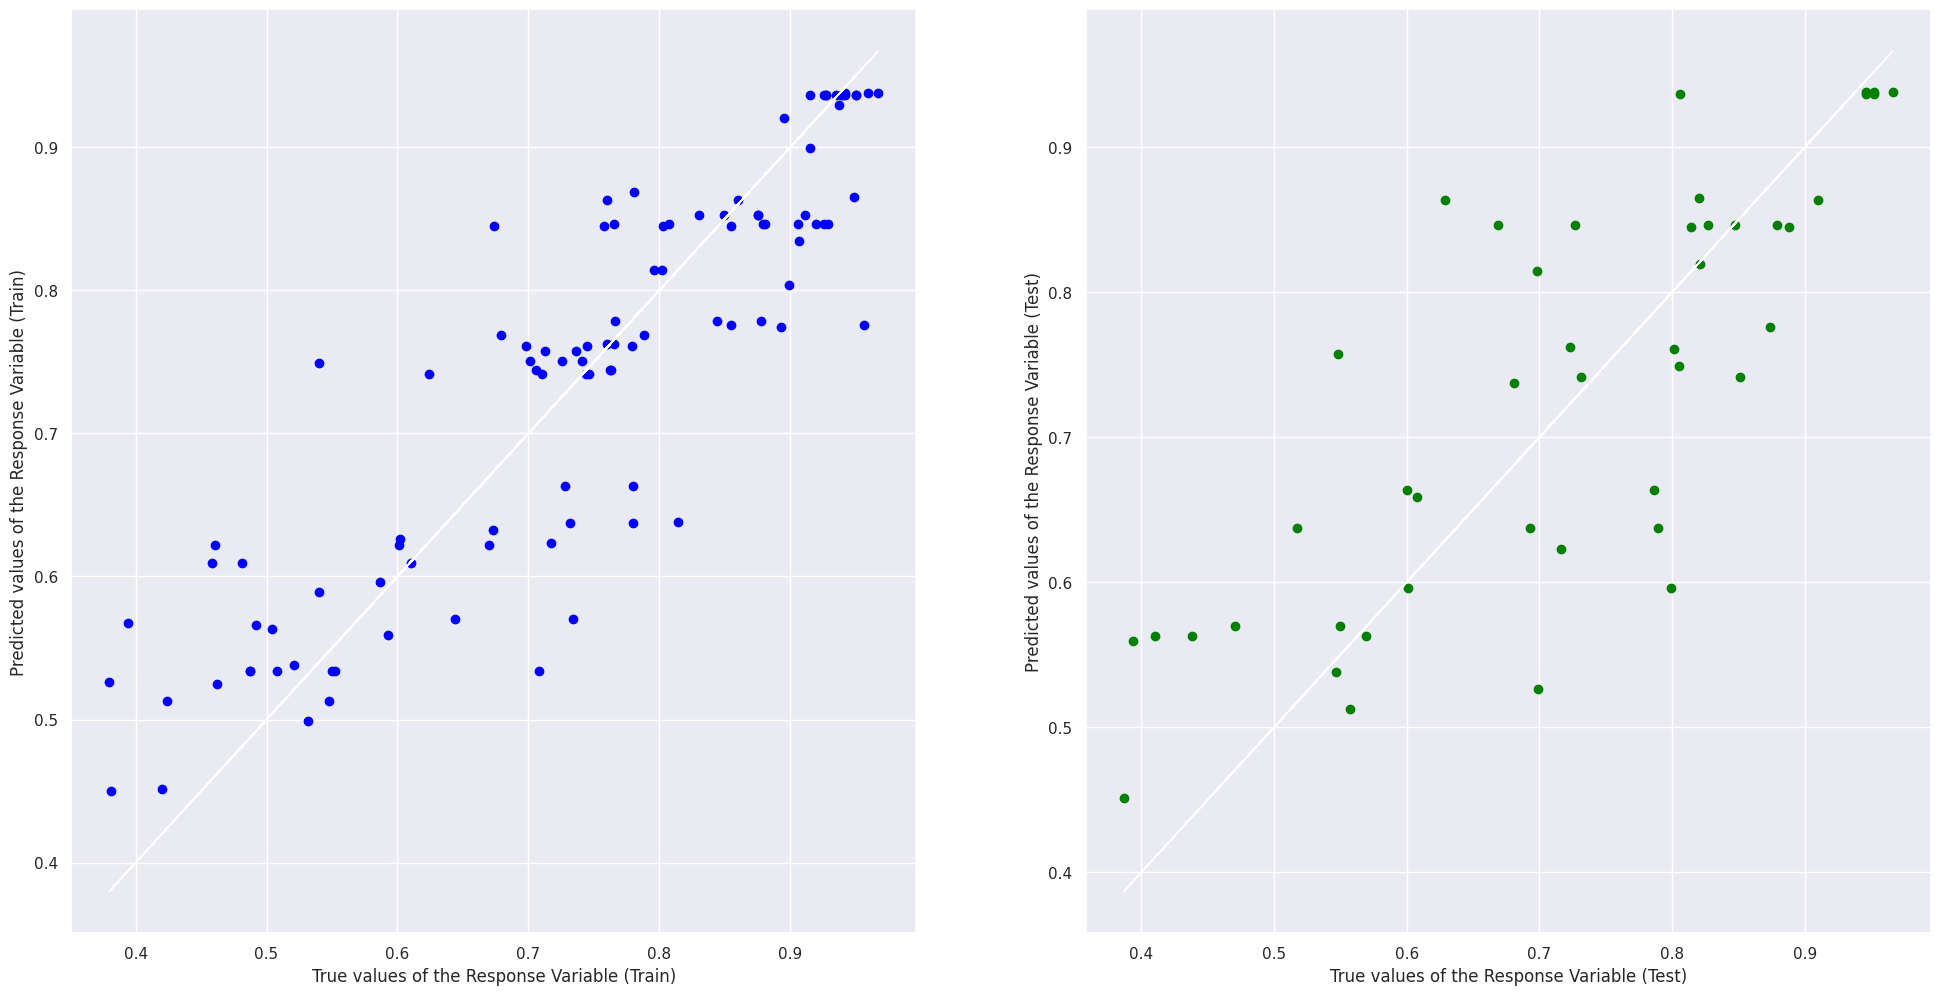

In [ ]:
# Create the Random Forest
regress = RandomForestRegressor(n_estimators=30,max_depth=3,random_state=42)   
regress.fit(y_train, z_train)
z_train_pred = regress.predict(y_train)
z_test_pred = regress.predict(y_test)

# Plot the Predictions vs the True values
f, axes = plt.subplots(1, 2, figsize=(24, 12))
axes[0].scatter(z_train, z_train_pred, color = "blue")
axes[0].plot(z_train, z_train, 'w-', linewidth = 1)
axes[0].set_xlabel("True values of the Response Variable (Train)")
axes[0].set_ylabel("Predicted values of the Response Variable (Train)")
axes[1].scatter(z_test, z_test_pred, color = "green")
axes[1].plot(z_test, z_test, 'w-', linewidth = 1)
axes[1].set_xlabel("True values of the Response Variable (Test)")
axes[1].set_ylabel("Predicted values of the Response Variable (Test)")
plt.show()

In [ ]:
print("Explained Variance (R^2) on Train Set \t:", regress.score(y_train, z_train))
print("Mean Squared Error (MSE) on Train Set \t:", mean_squared_error(z_train, z_train_pred))
print("Explained Variance (R^2) on Test Set \t:", regress.score(y_test, z_test))
print("Mean Squared Error (MSE) on Test Set \t:", mean_squared_error(z_test, z_test_pred))

Explained Variance (R^2) on Train Set 	: 0.7907338759287061
Mean Squared Error (MSE) on Train Set 	: 0.00558964721860761
Explained Variance (R^2) on Test Set 	: 0.6276949367088965
Mean Squared Error (MSE) on Test Set 	: 0.009783657858599469


## Model 2: Gradient Boosting

#### Gradient Boosting is another supervised-learning tree-based model like Random Forest. It builds an ensemble of decision trees sequentially. Each subsequent tree is trained to correct the errors made by the previous trees. Gradient Boosting optimizes a loss function by adding weak learners (shallow decision trees) in a stepwise manner. The ability to tune its hyperparameters should also typically allow Gradient Boosting to have a higher predictive accuracy than Random Forest.

### First Gradient Boosting is done to predict 'Happiness Score'

/shared-libs/python3.11/py/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:424: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


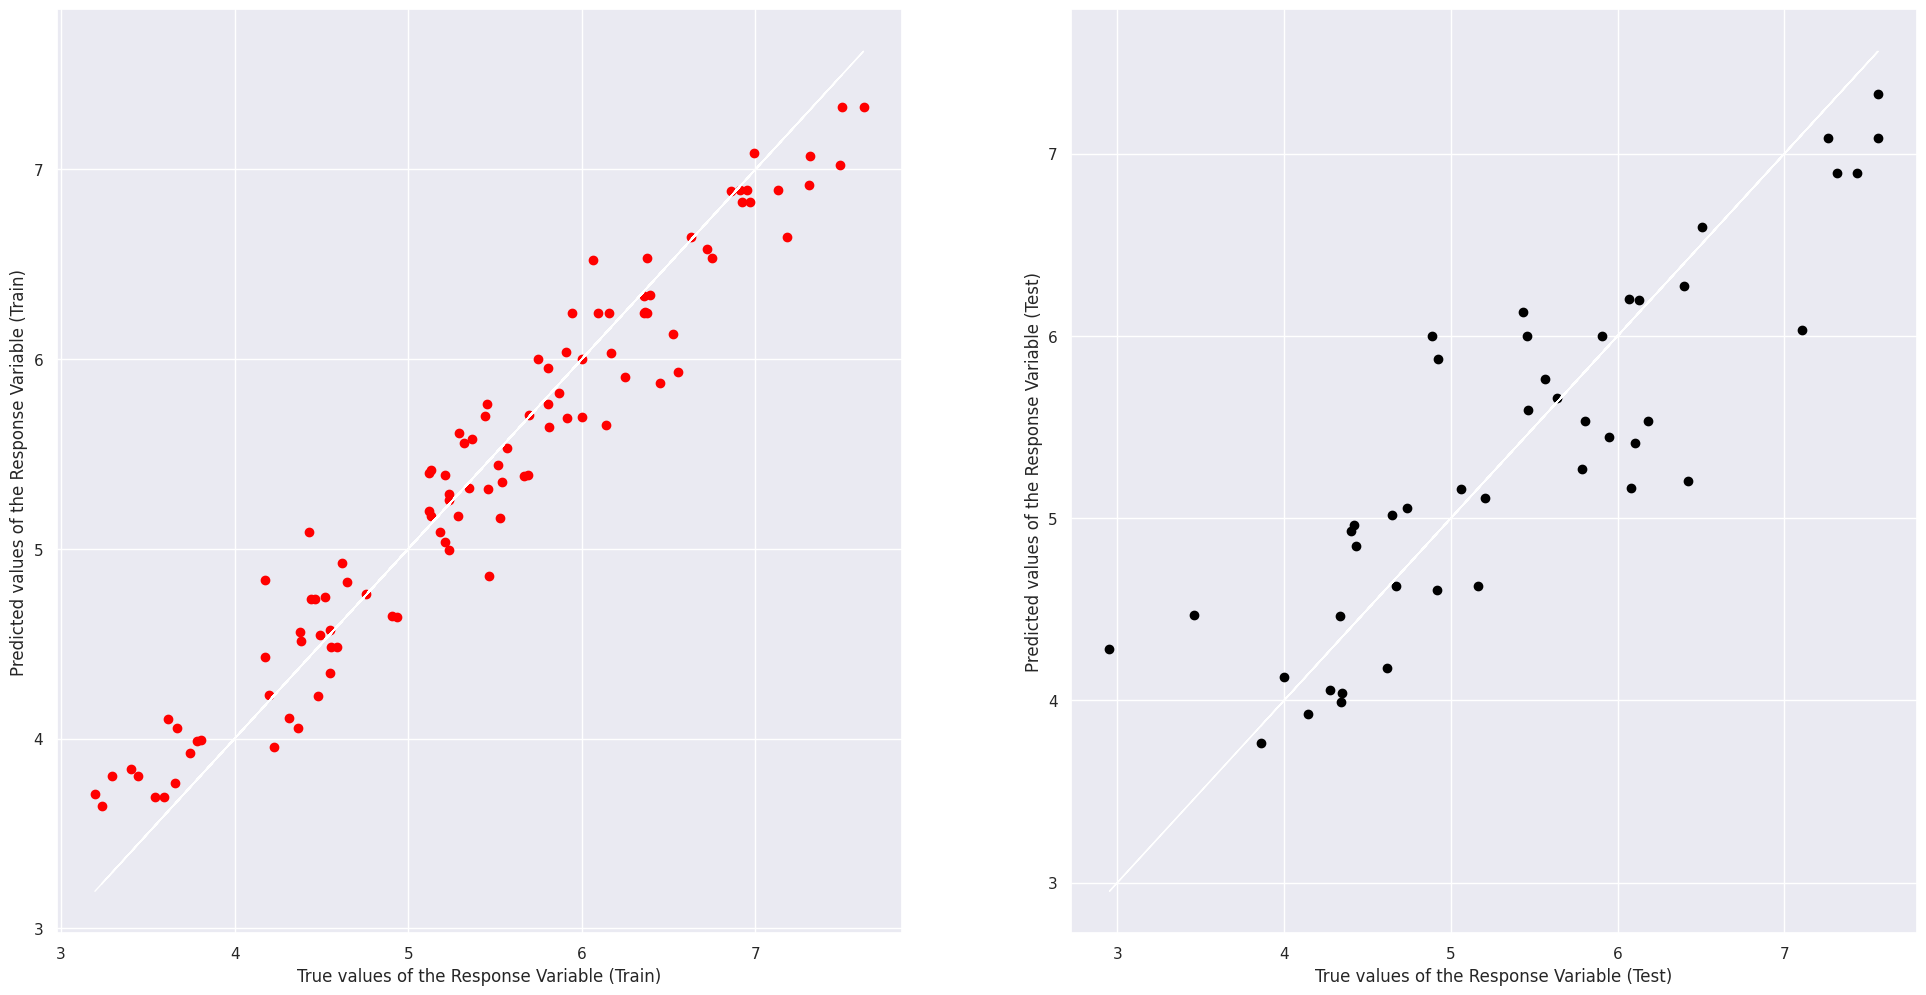

In [ ]:
# Initialize and fit the Gradient Boosting model
model = GradientBoostingRegressor(n_estimators=30, learning_rate=0.1, max_depth=3, random_state=42)
model.fit(x_train, y_train)
y_train_pred = model.predict(x_train)
y_test_pred = model.predict(x_test)

# Plot the Predictions vs the True values
f, axes = plt.subplots(1, 2, figsize=(24, 12))
axes[0].scatter(y_train, y_train_pred, color = "red")
axes[0].plot(y_train, y_train, 'w-', linewidth = 1)
axes[0].set_xlabel("True values of the Response Variable (Train)")
axes[0].set_ylabel("Predicted values of the Response Variable (Train)")
axes[1].scatter(y_test, y_test_pred, color = "black")
axes[1].plot(y_test, y_test, 'w-', linewidth = 1)
axes[1].set_xlabel("True values of the Response Variable (Test)")
axes[1].set_ylabel("Predicted values of the Response Variable (Test)")
plt.show()

In [ ]:
print("Explained Variance (R^2) on Train Set \t:", model.score(x_train, y_train))
print("Mean Squared Error (MSE) on Train Set \t:", mean_squared_error(y_train, y_train_pred))
print("Explained Variance (R^2) on Test Set \t:", model.score(x_test, y_test))
print("Mean Squared Error (MSE) on Test Set \t:", mean_squared_error(y_test, y_test_pred))

Explained Variance (R^2) on Train Set 	: 0.9397541752889639
Mean Squared Error (MSE) on Train Set 	: 0.0749756603390212
Explained Variance (R^2) on Test Set 	: 0.7613007221292869
Mean Squared Error (MSE) on Test Set 	: 0.30001456561069567


In [ ]:
# Calculate feature importance
feature_importance = model.feature_importances_

# Create a DataFrame to display feature importance scores
feature_importance_df = pd.DataFrame({'Feature': x.columns, 'Importance': feature_importance})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Display feature importance scores
print(feature_importance_df)

                                 Feature  Importance
2  Explained by: Healthy life expectancy    0.446225
0           Explained by: GDP per capita    0.341526
1           Explained by: Social support    0.212250


### Second using "Happiness Score' to predict 'HDI Value'

/shared-libs/python3.11/py/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:424: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


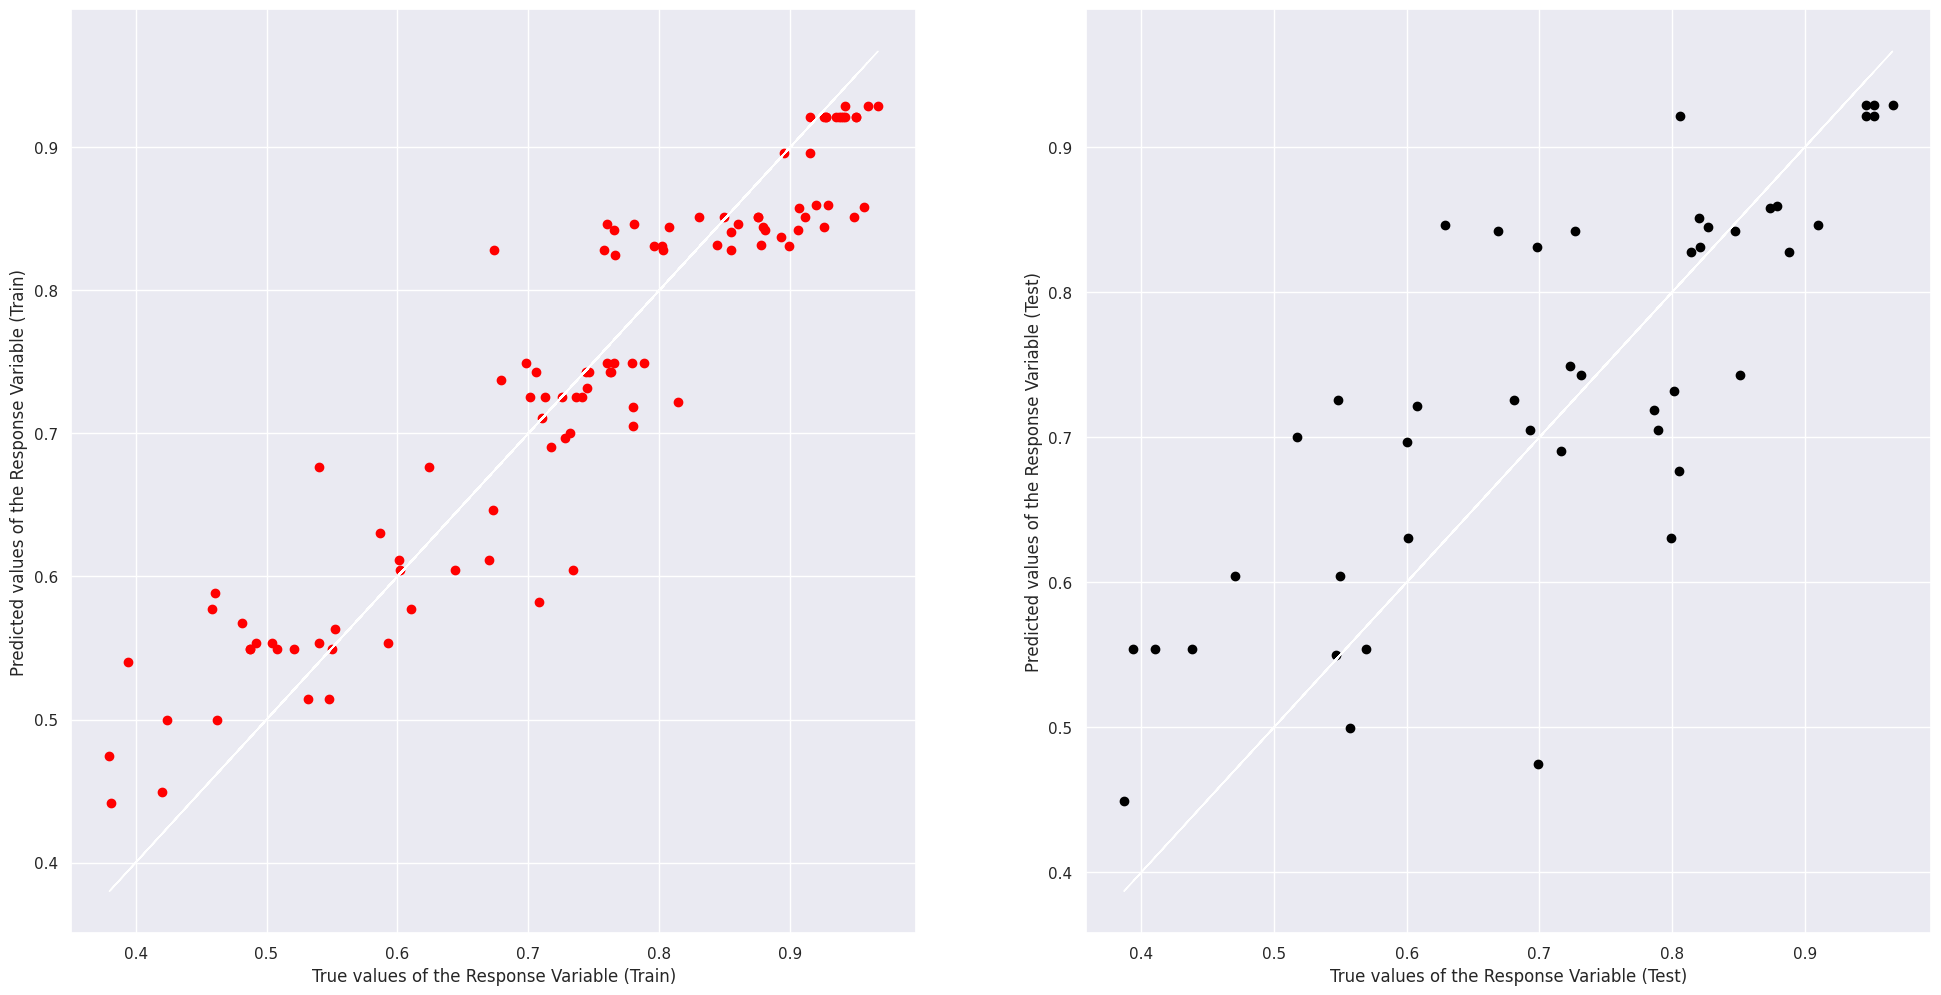

In [ ]:
# Initialize and fit the Gradient Boosting model
model = GradientBoostingRegressor(n_estimators=30, learning_rate=0.1, max_depth=3, random_state=42)
model.fit(y_train, z_train)
z_train_pred = model.predict(y_train)
z_test_pred = model.predict(y_test)

# Plot the Predictions vs the True values
f, axes = plt.subplots(1, 2, figsize=(24, 12))
axes[0].scatter(z_train, z_train_pred, color = "red")
axes[0].plot(z_train, z_train, 'w-', linewidth = 1)
axes[0].set_xlabel("True values of the Response Variable (Train)")
axes[0].set_ylabel("Predicted values of the Response Variable (Train)")
axes[1].scatter(z_test, z_test_pred, color = "black")
axes[1].plot(z_test, z_test, 'w-', linewidth = 1)
axes[1].set_xlabel("True values of the Response Variable (Test)")
axes[1].set_ylabel("Predicted values of the Response Variable (Test)")
plt.show()

In [ ]:
print("Explained Variance (R^2) on Train Set \t:", model.score(y_train, z_train))
print("Mean Squared Error (MSE) on Train Set \t:", mean_squared_error(z_train, z_train_pred))
print("Explained Variance (R^2) on Test Set \t:", model.score(y_test, z_test))
print("Mean Squared Error (MSE) on Test Set \t:", mean_squared_error(z_test, z_test_pred))

Explained Variance (R^2) on Train Set 	: 0.8853765024776076
Mean Squared Error (MSE) on Train Set 	: 0.0030616752565973773
Explained Variance (R^2) on Test Set 	: 0.6296282469728007
Mean Squared Error (MSE) on Test Set 	: 0.009732853160996502


## After trying out the 2 supervised-learning tree-based models, we decided to try out the dataset on an unsupervised-learning model to determine whether we would achieve similar results.


## Model 3: K-Means

/shared-libs/python3.11/py/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


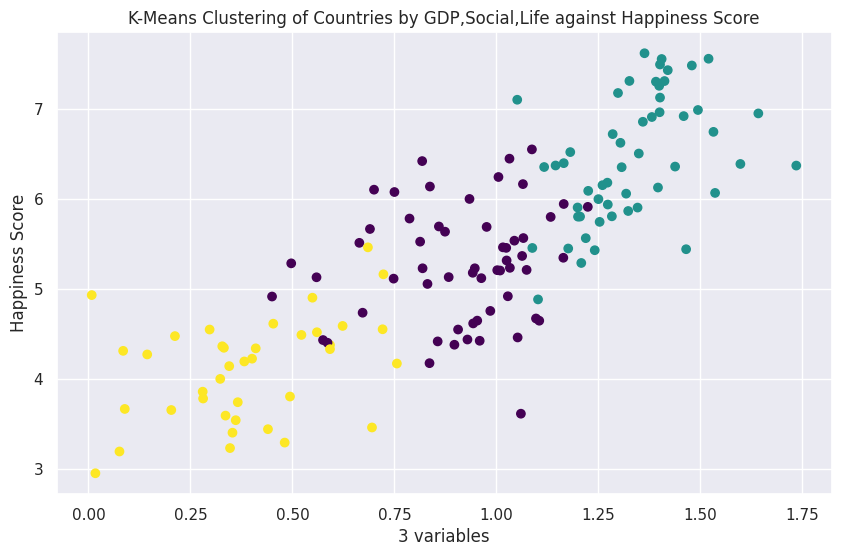

MSE: 0.4115814661916137
RMSE: 0.6415461528149115


In [ ]:
# Data preparation
X = Updatereport[['Explained by: GDP per capita','Explained by: Social support','Explained by: Healthy life expectancy']]
y = Updatereport['Happiness score']

# Scaling features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Applying K-Means
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X_scaled, y)

# Predicting clusters
clusters = kmeans.predict(X_scaled)

# Plotting the clustering result
plt.figure(figsize=(10,6))
plt.scatter(X['Explained by: GDP per capita'], y, c=clusters, cmap='viridis', marker='o')
plt.xlabel('3 variables')
plt.ylabel('Happiness Score')
plt.title('K-Means Clustering of Countries by GDP,Social,Life against Happiness Score')
plt.show()

import numpy as np
from sklearn.metrics import mean_squared_error
clustered_happiness_scores = {}
for cluster in np.unique(clusters):
    clustered_happiness_scores[cluster] = y[clusters == cluster].mean()

# Now predict the happiness score for each sample in X using the cluster's happiness score
y_pred = np.array([clustered_happiness_scores[cluster] for cluster in clusters])

# Calculate MSE and RMSE
mse = mean_squared_error(y, y_pred)
rmse = np.sqrt(mse)

print(f'MSE: {mse}')
print(f'RMSE: {rmse}')


/shared-libs/python3.11/py/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


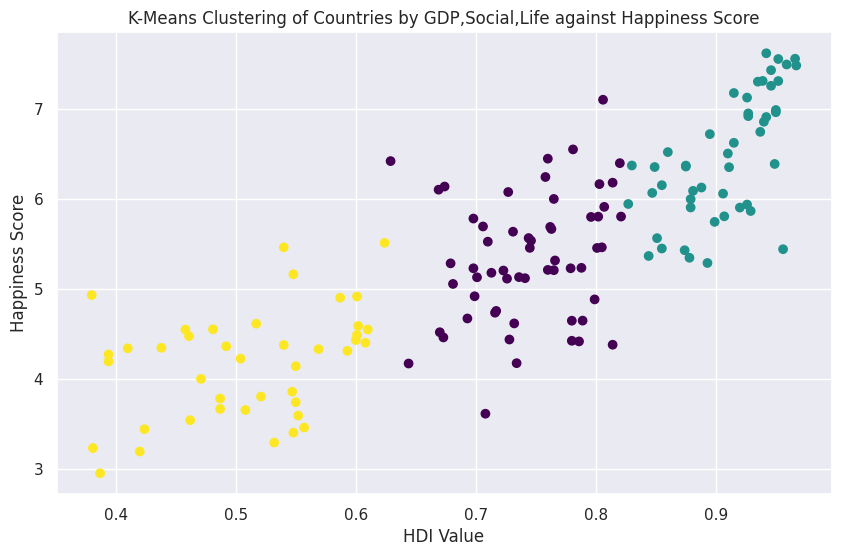

MSE: 0.44940827971356295
RMSE: 0.6703792059077929


In [ ]:
# Data preparation
X = Updatereport[['HDI Value']]
y = Updatereport['Happiness score']

# Scaling features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Applying K-Means
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X_scaled, y)

# Predicting clusters
clusters = kmeans.predict(X_scaled)

# Plotting the clustering result
plt.figure(figsize=(10,6))
plt.scatter(X['HDI Value'], y, c=clusters, cmap='viridis', marker='o')
plt.xlabel('HDI Value')
plt.ylabel('Happiness Score')
plt.title('K-Means Clustering of Countries by GDP,Social,Life against Happiness Score')
plt.show()

import numpy as np
from sklearn.metrics import mean_squared_error
clustered_happiness_scores = {}
for cluster in np.unique(clusters):
    clustered_happiness_scores[cluster] = y[clusters == cluster].mean()

# Now predict the happiness score for HDI Value using the cluster's happiness score
y_pred = np.array([clustered_happiness_scores[cluster] for cluster in clusters])

# Calculate MSE and RMSE
mse = mean_squared_error(y, y_pred)
rmse = np.sqrt(mse)

print(f'MSE: {mse}')
print(f'RMSE: {rmse}')


#### We used the HDI Value as the feature for clustering and the Happiness score as the target variable to be predicted.

#### Firstly, we scaled the HDI values using the StandardScaler to ensure the clustering algorithm performs optimally by normalizing the range of the data.

#### Secondly, we applied the k-means clustering algorithm to the scaled HDI values, specifying three clusters. This helped in identifying three groups of countries based on their HDI similarities.

#### We then predicted the cluster for each data point (country) based on their scaled HDI value, and visualized the clustering outcome by plotting the original HDI values against the happiness scores, using different colors to distinguish the clusters. 

#### We then calculated the mean happiness score for each cluster, which represents the average happiness score of countries grouped together based on similar HDI values.

#### Using the mean happiness scores of clusters, we predicted the happiness score for each country based on its cluster membership.

#### Finally, we then calculated the mean squared error (MSE) and the root mean squared error (RMSE) between the actual happiness scores and our predictions to evaluate the accuracy of using clustered HDI values to predict happiness scores.

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=0674b5d1-0671-4d0f-ad7c-f1e1b27d9175' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>